# Origine des données

Les données proviennent de la DREES : c'est la **Direction de la recherche, des études, de l'évaluation et des statistiques** du **Ministère des Solidarités et de la Santé.**

La publication se fait sur le site opendata de la DREES : [cliquer sur le lien](https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut)

Pour en savoir plus sur les travaux de la DREES : [cliquer sur le lien](https://drees.solidarites-sante.gouv.fr/article/les-travaux-de-la-drees-lies-la-crise-sanitaire-de-la-covid-19)

La publication se fait à un rythme hebdomadaire depuis le 6/08/2021. A cette date, les dernières données disponibles dataient du 23/07.

**On peut donc s'attendre à :**
- publication le 13/08 des données allant jusqu'au 24/07
- publication le 20/08 des données allant jusqu'au 31/07

Au 23/07,
les taux quotidiens pour 100 000 habitants sont les suivants:


- entrées en hospitalisation : 3.83
- entrées en réanimation : 0.98
- décès : 0.25


- incidence : 274.88
- tests PCR : 5299.12
- positivité (%) : 0.52

# Timeline
This analysis was first published on Twitter here: https://twitter.com/E_Dmz/status/1423963822251991040
and here: https://twitter.com/E_Dmz/status/1423692017406775303

Similar analyses can be found here: https://twitter.com/GuillaumeRozier/status/1423609751858991104 (@GuillaumeRozier) and here : https://twitter.com/nicolasberrod/status/1423588729097265155 (@nicolasberrod)

# Libraries and functions

In [165]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

def save_output(fig, dir_name, fig_name, with_date = True, with_SVG = False):
    """Saves pyplot figures as a directory in dir_PNG, with or without the date
    fig: pyplot figure
    dir_fig: str
    name: str
    with_date: boolean
    """
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
    now_str = dt.datetime.now().strftime("%Y-%m-%d %Hh%M ") if with_date else ''
    fname_PNG = f"{dir_name}{now_str}{fig_name}.png"
    fig.savefig(fname_PNG, bbox_inches = 'tight', pad_inches = 0.3, dpi = 150)
    
    if with_SVG:
        dir_SVG = f"{dir_name}SVG/"
        os.makedirs(dir_SVG) if not os.path.exists(dir_SVG) else None
        fname_SVG = f"{dir_SVG}{now_str} {fig_name}.svg"
        fig.savefig(fname_SVG, bbox_inches = 'tight', pad_inches = 0.3, dpi = 150)
        
def pretty_sample(df_name_as_string, nlines = 3):
    """pretty_prints a pandas DataFrame
    df_name_as_string: string"""
    print(f"\n\n***Sample of {df_name_as_string}:")
    return eval(f"{df_name_as_string}.sample(nlines)")

def simplify_df(df, vac_statut):
    """only retain one vac_status"""
    simplified_df = df.copy()
    return simplified_df[simplified_df.vac_statut == vac_statut]

def display_vac_statuts(df):
    """just to check vac_statuses in df"""
    print(df.vac_statut.unique())

In [166]:
dt.datetime.now().strftime("%Y-%m-%d %H:%M")

'2021-08-20 19:01'

In [167]:
os.getcwd()

'C:\\Users\\etien\\DisplayDataCovid-master\\DisplayDataCovid-master\\Code\\Supp_ DREES dataset analysis'

# Prepare the data
The data were downloaded from https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut into the parent folder of this notebook.


In [221]:
df_raw = pd.read_csv('covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si (3).csv', sep = ';', parse_dates = ['date'])
pretty_sample("df_raw")

df = df_raw.copy()
dPrimo = df[df.vac_statut.isin(["Primo dose efficace", "Primo dose récente"])].groupby(['date'])[['nb_PCR', 'nb_PCR_sympt', 'nb_PCR+',
       'nb_PCR+_sympt', 'HC', 'HC_PCR+', 'SC', 'SC_PCR+', 'DC', 'DC_PCR+', 'effectif J-7']].sum().reset_index()
dPrimo['vac_statut'] = 'Primo-dose'
pretty_sample("dPrimo")

df = df_raw.copy()
dEnsemble = df[df.vac_statut.isin(["Non-vaccinés", "Primo-dose", "Vaccination complète"])].groupby(['date'])[['nb_PCR', 'nb_PCR_sympt', 'nb_PCR+',
       'nb_PCR+_sympt', 'HC', 'HC_PCR+', 'SC', 'SC_PCR+', 'DC', 'DC_PCR+', 'effectif J-7']].sum().reset_index()
dEnsemble['vac_statut'] = 'Ensemble'
pretty_sample("dEnsemble")

df_merged = pd.concat([df, dPrimo, dEnsemble])
df_merged = df_merged.sort_values('date')
pretty_sample("df_merged")


# odds per 10 million people

df = df_merged.copy()
df['Effectif en Mns'] = df['effectif J-7'] / 1e6
df['PCR_odds'] = df['nb_PCR']/df['effectif J-7'] * 1e7
df['PCR_pos_odds'] = df['nb_PCR+']/df['effectif J-7'] * 1e7
df['positivity'] = df['nb_PCR+']/df['nb_PCR'] * 100
df['HC_odds'] = df['HC_PCR+']/df['effectif J-7'] * 1e7
df['SC_odds'] = df['SC_PCR+']/df['effectif J-7'] * 1e7
df['DC_odds'] = df['DC_PCR+']/df['effectif J-7'] * 1e7

# df['HC_PCR_pos_odds'] = df['HC_PCR+']/df['effectif J-7'] * 1e7
# df['SC_PCR_pos_odds'] = df['SC_PCR+']/df['effectif J-7'] * 1e7
# df['DC_PCR_pos_odds'] = df['DC_PCR+']/df['effectif J-7'] * 1e7

df_with_computed_indicators = df.copy()
pretty_sample("df_with_computed_indicators")

df = df_with_computed_indicators.copy()
df = df[['date', 'vac_statut', 'effectif J-7', 'HC_odds', 'SC_odds', 'DC_odds', 'PCR_odds', 'PCR_pos_odds', 'positivity',
       'Effectif en Mns']]
#df.loc[df.vac_statut == 'Somme des primo-doses', "vac_statut"] = "Primo-dose"
pretty_sample("df")

for vac_statut in ['Ensemble', 'Non-vaccinés', 'Primo-dose', 'Vaccination complète']:
    simplified_df = simplify_df(df, vac_statut)
    pretty_sample("simplified_df", nlines = 1)



***Sample of df_raw:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
26,2021-06-15,Primo dose efficace,23760,1386,134,30,9,9,2,1,3,3,11115556
141,2021-06-03,Primo dose récente,13328,967,354,155,10,9,6,6,0,0,5634710
63,2021-07-04,Primo dose récente,1215,49,18,4,0,0,0,0,0,0,3171547




***Sample of dPrimo:


,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,vac_statut
41,2021-07-11,5553,352,116,51,3,3,0,0,1,1,13387502,Primo-dose
19,2021-06-19,24450,798,148,31,12,11,1,1,4,3,16682454,Primo-dose
29,2021-06-29,30048,2218,225,90,8,6,0,0,0,0,16070331,Primo-dose




***Sample of dEnsemble:


,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,vac_statut
68,2021-08-07,154844,11286,9871,4086,500,346,146,108,39,20,57848581,Ensemble
30,2021-06-30,159452,9825,2241,749,95,67,23,14,12,9,51509085,Ensemble
0,2021-05-31,229094,24886,10227,4007,352,247,100,71,31,17,53613838,Ensemble




***Sample of df_merged:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
4,2021-06-17,Non-vaccinés,133104,8359,2209,657,123,77,40,26,30,21,37615420
100,2021-06-14,Non-vaccinés,150253,11293,3567,1156,164,116,42,30,20,17,38780392
34,2021-07-02,Primo dose efficace,33259,1558,227,66,1,1,3,2,4,3,11856171




***Sample of df_with_computed_indicators:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,Effectif en Mns,PCR_odds,PCR_pos_odds,positivity,HC_odds,SC_odds,DC_odds
30,2021-06-24,Primo dose efficace,28306,1381,118,40,4,3,0,0,1,1,11890123,11.890123,23806.313862,99.242035,0.416873,2.523103,0.000000,0.841034
11,2021-07-09,Non-vaccinés,176119,9308,3510,1202,77,60,26,19,7,3,32808898,32.808898,53680.254667,1069.831727,1.992971,18.287722,5.791112,0.914386
146,2021-06-24,Primo dose récente,8437,419,63,24,3,2,1,1,0,0,4711433,4.711433,17907.502877,133.717279,0.746711,4.244993,2.122496,0.000000




***Sample of df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
67,2021-07-17,Primo dose récente,2478370,4.034910,4.034910,0.000000,23745.445595,1089.425711,4.587935,2.478370
24,2021-06-24,Ensemble,50805685,16.336754,3.149254,2.755597,29259.717687,366.297591,1.251884,50.805685
121,2021-06-19,Primo dose efficace,11622615,6.022741,0.860392,2.581175,15840.669247,85.178766,0.537722,11.622615




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
63,2021-08-02,Ensemble,57783641,66.281735,18.86347,4.499543,48610.124793,4583.8233,9.429771,57.783641




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
209,2021-07-05,Non-vaccinés,33617658,18.442689,3.867015,1.189851,51138.898492,993.228023,1.942216,33.617658




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
57,2021-07-27,Primo-dose,9812898,21.400406,2.038134,1.019067,36806.659969,2691.355805,7.312144,9.812898




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
189,2021-08-04,Vaccination complète,31620184,19.923983,3.162537,1.897522,20355.036517,853.252467,4.191849,31.620184


In [222]:
#df.loc[df.vac_statut == 'Somme des primo-doses', "vac_statut"] = "Primo-dose"

# Dernières valeurs

In [223]:
date_max_moins_un = df.date.max() - pd.DateOffset(2)
date_max_moins_un

Timestamp('2021-08-06 00:00:00')

In [224]:
df_last = df[df.date == date_max_moins_un]
df_last = df_last.set_index('vac_statut')

In [225]:
#df_last.index = df_last.index.str.replace(' ', '_')

In [226]:
df_last.index

Index(['Primo-dose', 'Vaccination complète', 'Non-vaccinés',
       'Primo dose efficace', 'Ensemble', 'Primo dose récente'],
      dtype='object', name='vac_statut')

In [227]:
df_last

,date,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
vac_statut,,,,,,,,,
Primo-dose,2021-08-06,9591561,36.490411,9.383248,2.085166,65092.637163,2677.353561,4.113143,9.591561
Vaccination complète,2021-08-06,32561381,23.954758,3.071123,1.842674,21920.139075,838.416528,3.824869,32.561381
Non-vaccinés,2021-08-06,25254299,117.207767,46.724718,10.295277,80602.514447,6586.205382,8.171216,25.254299
Primo dose efficace,2021-08-06,4468328,40.283524,4.475947,4.475947,68598.366100,2231.259657,3.252643,4.468328
Ensemble,2021-08-06,57815680,64.688334,22.139323,5.534831,47553.016759,3349.091458,7.042858,57.815680
Primo dose récente,2021-08-06,5123233,33.182172,13.663247,0.000000,62035.047010,3066.423097,4.943050,5.123233


In [228]:
# 75 / 10M = 7500 / 100k
# DC 1/ 100 k / week = 100/ 10M / w = 14 / 10 M / day
# SC 20 / 10 M / day = 140 / 10 M / week = 1.4 / 100 k / w
# PCR 55 000 -> 550 -> 3850
# PCR + 3000 -> 30 -> 210

In [229]:
df_last.loc[['Ensemble','Non-vaccinés','Primo dose récente','Primo dose efficace','Primo-dose','Vaccination complète'],:]

,date,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
vac_statut,,,,,,,,,
Ensemble,2021-08-06,57815680,64.688334,22.139323,5.534831,47553.016759,3349.091458,7.042858,57.815680
Non-vaccinés,2021-08-06,25254299,117.207767,46.724718,10.295277,80602.514447,6586.205382,8.171216,25.254299
Primo dose récente,2021-08-06,5123233,33.182172,13.663247,0.000000,62035.047010,3066.423097,4.943050,5.123233
Primo dose efficace,2021-08-06,4468328,40.283524,4.475947,4.475947,68598.366100,2231.259657,3.252643,4.468328
Primo-dose,2021-08-06,9591561,36.490411,9.383248,2.085166,65092.637163,2677.353561,4.113143,9.591561
Vaccination complète,2021-08-06,32561381,23.954758,3.071123,1.842674,21920.139075,838.416528,3.824869,32.561381


In [230]:
df_last_ensemble = df_last.loc[['Ensemble'],:]
print(f"Au jour du {date_max_moins_un},\n\
les taux quotidiens pour 100 000 habitants sont les suivants:\n\n\n\
- entrées en hospitalisation : {df_last_ensemble.HC_odds.values[0] / 10:.2f}\n\
- entrées en réanimation : {df_last_ensemble.SC_odds.values[0] / 10:.2f}\n\
- décès : {df_last_ensemble.DC_odds.values[0] / 10:.2f}\n\n\n\
- incidence : {df_last_ensemble.PCR_pos_odds.values[0]/10:.2f}\n\
- tests PCR : {df_last_ensemble.PCR_odds.values[0] / 10:.2f}\n\
- positivité (%) : {df_last_ensemble.positivity.values[0] / 10:.2f}\n\
")

Au jour du 2021-08-06 00:00:00,
les taux quotidiens pour 100 000 habitants sont les suivants:


- entrées en hospitalisation : 6.47
- entrées en réanimation : 2.21
- décès : 0.55


- incidence : 334.91
- tests PCR : 4755.30
- positivité (%) : 0.70



# Graphes "à la John Burn-Murdoch"

In [231]:
def plot_Burn_Murdoch(df, vac_statut, label, coeff, color, title_part):

    fig, ax = plt.subplots(figsize= (8,4))

    df_to_plot = df[df.vac_statut == vac_statut]
    s = ax.fill_between(df_to_plot.date, df_to_plot.PCR_pos_odds/100, color = 'darkturquoise')
    #     rea_to_plot = d['taux rea']*coeff/100
    #     s = ax.fill_between(d.jour - pd.Timedelta(14,'D'), rea_to_plot, color = 'darksalmon')
#     rea_to_plot = df[df.vac_statut == population]['SC_odds']*coeff
    s = ax.fill_between(df_to_plot.date, df_to_plot[label]*coeff/100, color = color)
    #     ratio_to_plot = - rea_to_plot/incidence_to_plot
    #     s = ax.plot(d.jour, ratio_to_plot)
    
    s = ax.set_ylim(-75, 100)
    
    s=ax.spines['top'].set_visible(False)
    s=ax.spines['right'].set_visible(False)
#     s=ax.spines['bottom'].set_visible(False)
    s=ax.spines['left'].set_visible(False)
    s = ax.xaxis.set_tick_params(bottom = True, labelsize = 9)
    s = ax.set_xlim(dt.datetime(2021, 6, 15), 
                    dt.datetime(2021, 8, 15))
    xloc = [dt.datetime(2021, 6, 15),
           dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 15),
           dt.datetime(2021, 8, 1), dt.datetime(2021, 8, 15),]                    
    labels = ['15/06',
                  '01/07', '15/07', '01/08', '15/08']
    s=ax.xaxis.set_ticks(xloc)
    s=ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    rate_specifier = f"{int(-coeff/100):0,d} Mns d'habitants" if coeff <= -100 else f"{int(-coeff*10):0,d}k habitants"
    plt.legend([],[],
               title = f"""{vac_statut}
En turquoise :
cas positifs pour 100 000 d'habitants
{title_part} pour {rate_specifier}""",
              loc = 'upper left')
    #s=plt.title(f"{vac_statut}\nEn turquoise : cas positifs pour 100 000 d'habitants (taux d'incidence)\n{title_part} pour {rate_specifier}", loc = 'left')
    plt.tight_layout()
    save_output(fig, f'./Burn-Murdoch/', f"{label} {vac_statut}", with_date = True, with_SVG = False)

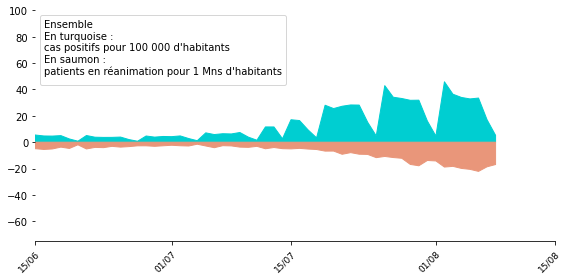

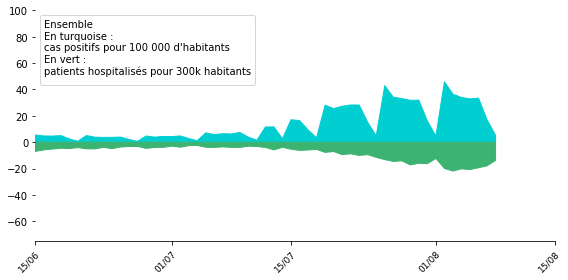

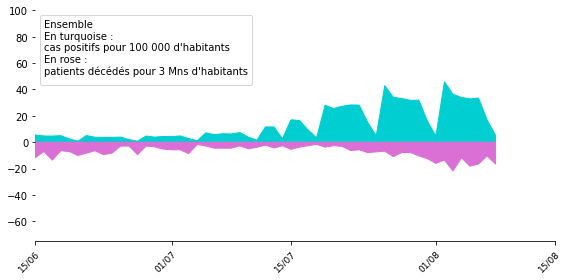

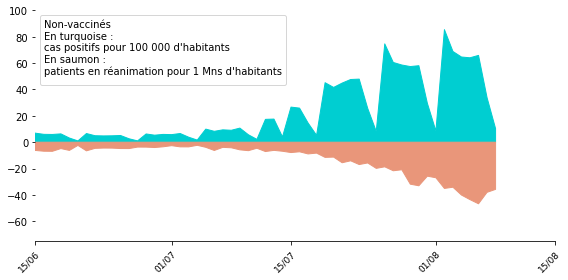

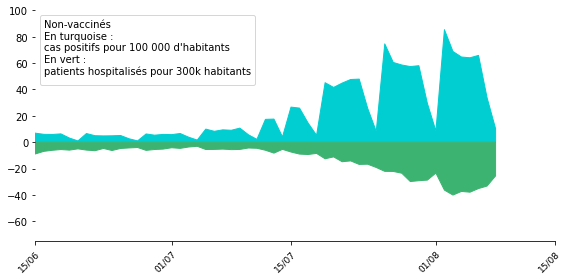

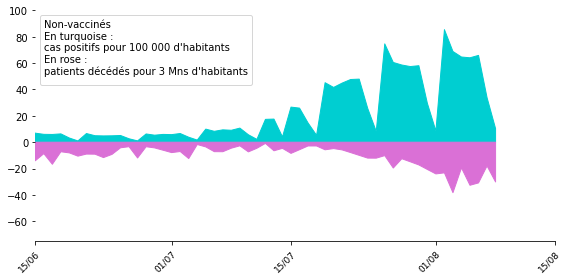

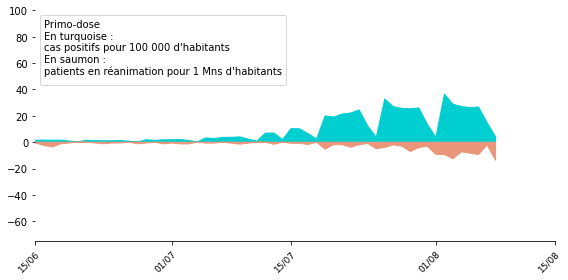

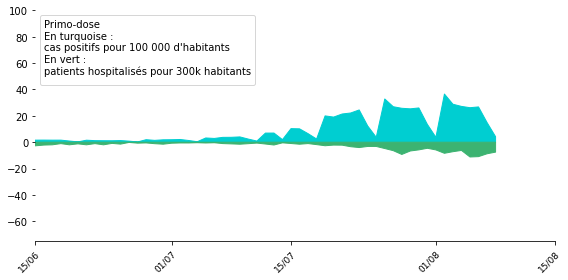

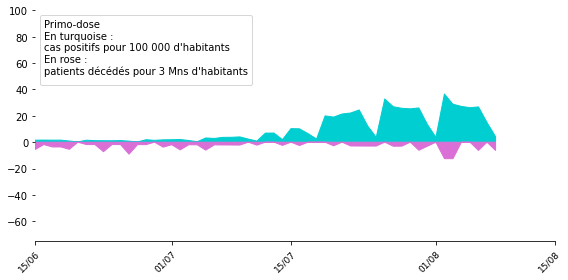

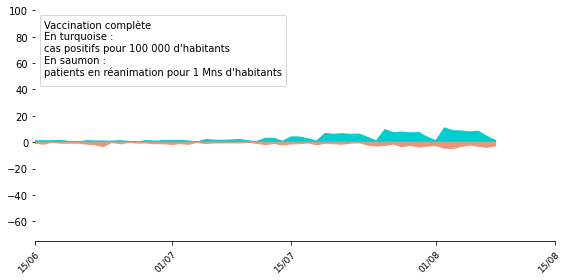

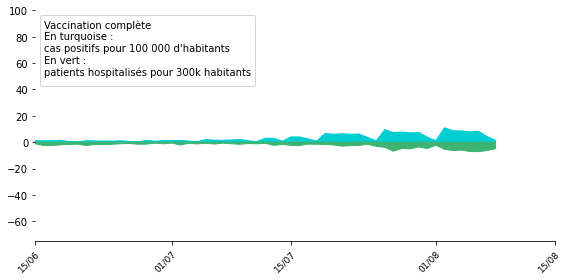

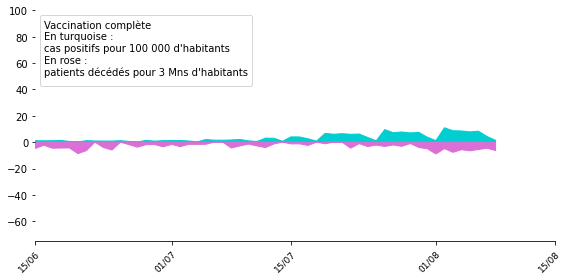

In [232]:
vac_statuts = ['Ensemble', 'Non-vaccinés', 'Primo-dose', 'Vaccination complète']
for vac_statut in vac_statuts:
    for label, coeff, color, title_part in zip(
        ['SC_odds', 'HC_odds', 'DC_odds'], 
        [-100, -30, -300], 
        ['darksalmon', 'mediumseagreen', 'orchid'],
        ['En saumon :\npatients en réanimation', 'En vert :\npatients hospitalisés', 'En rose :\npatients décédés']
        ):
        plt.rcParams["figure.facecolor"] = (1,1,1,1)
        plot_Burn_Murdoch(df, vac_statut, label, coeff, color, title_part)

In [233]:
df

,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
220,2021-05-31,Primo dose efficace,8277315,31.411152,1.208121,9.664970,33880.551846,558.152009,1.647411,8.277315
168,2021-05-31,Vaccination complète,9890219,21.233099,8.088800,1.011100,35452.197772,504.538878,1.423153,9.890219
0,2021-05-31,Primo-dose,13793403,27.549402,2.899937,5.799874,30046.972455,767.758326,2.555194,13.793403
140,2021-05-31,Primo dose récente,5516088,21.754548,5.438637,0.000000,24294.391242,1082.288752,4.454891,5.516088
96,2021-05-31,Non-vaccinés,43723619,51.688311,14.408688,3.659349,44376.701755,2224.884450,5.013632,43.723619
...,...,...,...,...,...,...,...,...,...,...
95,2021-08-08,Vaccination complète,32970348,16.378353,2.729726,2.123120,4475.233322,140.732515,3.144697,32.970348
69,2021-08-08,Primo-dose,9570106,25.078092,13.583967,2.089841,7766.894118,420.058043,5.408314,9.570106
238,2021-08-08,Primo dose efficace,4624615,23.785764,17.298737,4.324684,8681.803783,371.922852,4.283935,4.624615
257,2021-08-08,Primo dose récente,4945491,26.286571,10.110220,0.000000,6911.346113,465.070101,6.729081,4.945491


# Autres graphes

In [234]:
def plot_pop_vaccin(df, label, title, dominante):
    plt.rcParams["figure.facecolor"] = (1,1,1,1)
    fig, ax = plt.subplots(figsize = (8,4))
    populations = ['Non-vaccinés', 'Primo-dose', 'Vaccination complète']
#     colors = ['red', 'orange', 'green']
    colors = [dominante, 'black', 'firebrick']
    linewidths = [3,                 1.5,            1]
    for population, color, linewidth in zip(populations, colors, linewidths):  
        df_pop = df[df.vac_statut == population]
        ax.plot(df_pop.date, df_pop[label], c = color, label = population, linewidth = linewidth)
    plt.legend(title = title)
    ax.xaxis.set_tick_params(bottom = True, labelsize = 10)                     
    xloc = [dt.datetime(2021, 6, 15),
           dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 15),
           dt.datetime(2021, 8, 1), dt.datetime(2021, 8, 15),]                    
    labels = ['15/06',
                  '01/07', '15/07', '01/08', '15/08']
    ax.xaxis.set_ticks(xloc)
    ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
#     plt.title(label = title)
   # plt.tight_layout()
    save_output(fig, './', title, with_SVG = True)

In [235]:
df

,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
220,2021-05-31,Primo dose efficace,8277315,31.411152,1.208121,9.664970,33880.551846,558.152009,1.647411,8.277315
168,2021-05-31,Vaccination complète,9890219,21.233099,8.088800,1.011100,35452.197772,504.538878,1.423153,9.890219
0,2021-05-31,Primo-dose,13793403,27.549402,2.899937,5.799874,30046.972455,767.758326,2.555194,13.793403
140,2021-05-31,Primo dose récente,5516088,21.754548,5.438637,0.000000,24294.391242,1082.288752,4.454891,5.516088
96,2021-05-31,Non-vaccinés,43723619,51.688311,14.408688,3.659349,44376.701755,2224.884450,5.013632,43.723619
...,...,...,...,...,...,...,...,...,...,...
95,2021-08-08,Vaccination complète,32970348,16.378353,2.729726,2.123120,4475.233322,140.732515,3.144697,32.970348
69,2021-08-08,Primo-dose,9570106,25.078092,13.583967,2.089841,7766.894118,420.058043,5.408314,9.570106
238,2021-08-08,Primo dose efficace,4624615,23.785764,17.298737,4.324684,8681.803783,371.922852,4.283935,4.624615
257,2021-08-08,Primo dose récente,4945491,26.286571,10.110220,0.000000,6911.346113,465.070101,6.729081,4.945491


In [236]:
df[df['date'] ==  '2021-08-01T00:00:00.000000000']

,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
47,2021-08-01,Primo dose efficace,5703040,17.534508,5.260352,0.000000,5802.168668,248.990012,4.291327,5.703040
187,2021-08-01,Vaccination complète,30243982,7.604819,2.645154,2.975799,5086.301136,120.023878,2.359748,30.243982
62,2021-08-01,Ensemble,57671864,41.094562,14.218372,5.375238,8115.915934,467.125529,5.755672,57.671864
62,2021-08-01,Primo-dose,9735377,19.516450,9.244634,0.000000,6607.859151,371.839735,5.627235,9.735377
253,2021-08-01,Primo dose récente,4032337,22.319563,14.879709,0.000000,7747.368338,545.589320,7.042254,4.032337
113,2021-08-01,Non-vaccinés,27427882,78.022794,26.979845,8.021035,11456.590049,849.865112,7.418133,27.427882


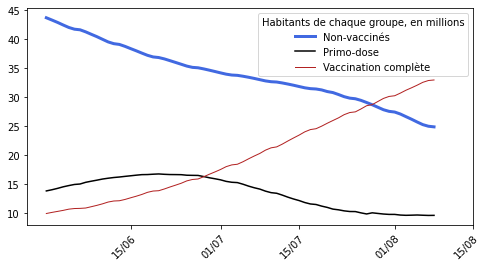

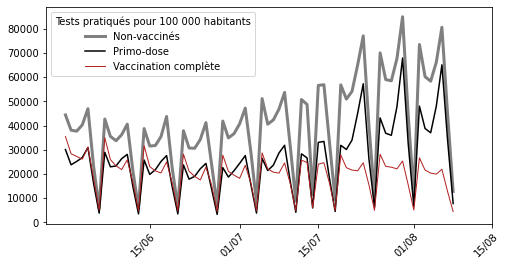

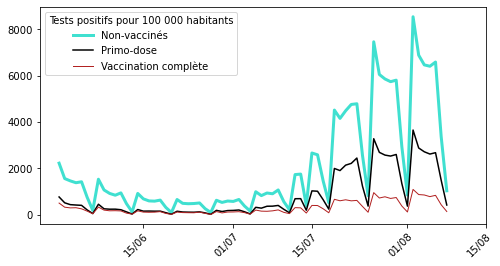

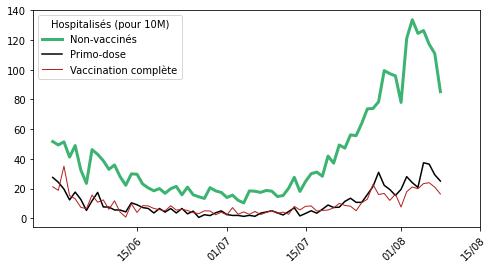

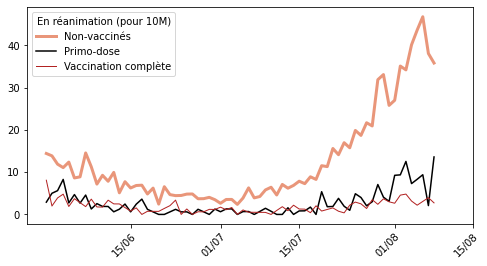

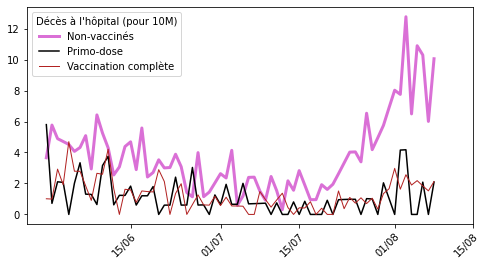

In [237]:
labels = ['Effectif en Mns', 'PCR_odds', 'PCR_pos_odds', 'HC_odds', 'SC_odds', 'DC_odds']
colors = ['royalblue', 'gray', 'turquoise', 'mediumseagreen', 'darksalmon', 'orchid']
titles = ['Habitants de chaque groupe, en millions',
          'Tests pratiqués pour 100 000 habitants',
          'Tests positifs pour 100 000 habitants',
          'Hospitalisés (pour 10M)',
          'En réanimation (pour 10M)',
          'Décès à l\'hôpital (pour 10M)'
         ]

for label, title, color in zip(labels, titles, colors):
    plot_pop_vaccin(df, label, title, color)